# **YULU CASESTUDY**

**PROBLEM STATEMENT**

The YULU company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands


**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


Dataset link: [Yulu_dataset](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv)

In [ ]:
#Downloading yulu dataset
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv'


--2025-03-27 12:25:12--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.238.59.58, 18.238.59.211, 18.238.59.71, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.238.59.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv’

bike_sharing.csv    100%[===================>] 633.16K  --.-KB/s    in 0.04s   

2025-03-27 12:25:12 (16.3 MB/s) - ‘bike_sharing.csv’ saved [648353/648353]



In [ ]:
# Import relevant Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data into dataframe object
df=pd.read_csv("bike_sharing.csv")

In [ ]:
# Look at the sample data(5 rows)
df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6292,2012-02-18 10:00:00,1,0,0,1,10.66,13.635,81,7.0015,48,157,205
5686,2012-01-12 02:00:00,1,0,1,3,14.76,17.425,93,16.9979,1,1,2
1264,2011-03-17 12:00:00,1,0,1,1,20.50,24.240,45,15.0013,24,81,105
3045,2011-07-15 19:00:00,3,0,1,1,28.70,31.820,45,15.0013,114,280,394
2637,2011-06-17 19:00:00,2,0,1,3,26.24,28.790,83,16.9979,53,275,328


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

The columns in the dataset specifies the following information:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [ ]:
# No. of rows and columns
df.shape

(10886, 12)

In [ ]:
# Basic Info: Column names, column data type, number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


df.info() provides a concise summary of a DataFrame, including the number of entries, column names, data types, non-null counts

From above information we can infer

Columns - season, holiday,workingday,weather,humidity,casual,registered,count are of integer type values

Columns - temp,atemp,windspeed are of float type data

Column-datetime-object type data

There are no missing values in dataset [shape - (10886, 12)]

In [ ]:
# Converting 'season', 'holiday', 'workingday', 'weather' columns into categorical type

# Columns to convert to categorical
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = pd.Categorical(df[col])

#Converting to to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB
None


In [ ]:
#provide statistical summary of columns
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


Inferences:

The average number of total rentals (count) is about 191.57, with a significant standard deviation (181.14), indicating high variability in demand. The minimum demand is as low as 1 rental, while the maximum reaches 977, demonstrating a wide range of demand levels.

On average, there are more registered users (155.55) than casual users (36.02). This indicates that a significant portion of Yulu's user base consists of regular, registered users.

 The season column has four unique values, representing the four seasons. The most frequent value (mode) is '4', which represent winter.

  The majority of days in the dataset are not holidays (frequency of 0 is 10575).

  The weather column has four unique values, representing different weather conditions. The most frequent value (mode) is '1' which represents Clear, Few clouds, partly cloudy

   The average temperature (temp) is 20.23°C with a standard deviation of 7.79. The minimum temperature is 0.82°C, and the maximum is 41°C.

   The average feeling temperature (atemp) is 23.65°C.

   The average humidity is 61.89% with a wide range (0% to 100%)

   The average windspeed is 12.80 with a wide range (0 to 56.99).

In [ ]:
# detecting missing values in the dataset
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no missing values present in the dataset.

In [ ]:
#number of unique values in each categorical type data
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [ ]:
# minimum datetime and maximum datetime
print(df['datetime'].min(), df['datetime'].max())

2011-01-01 00:00:00 2012-12-19 23:00:00


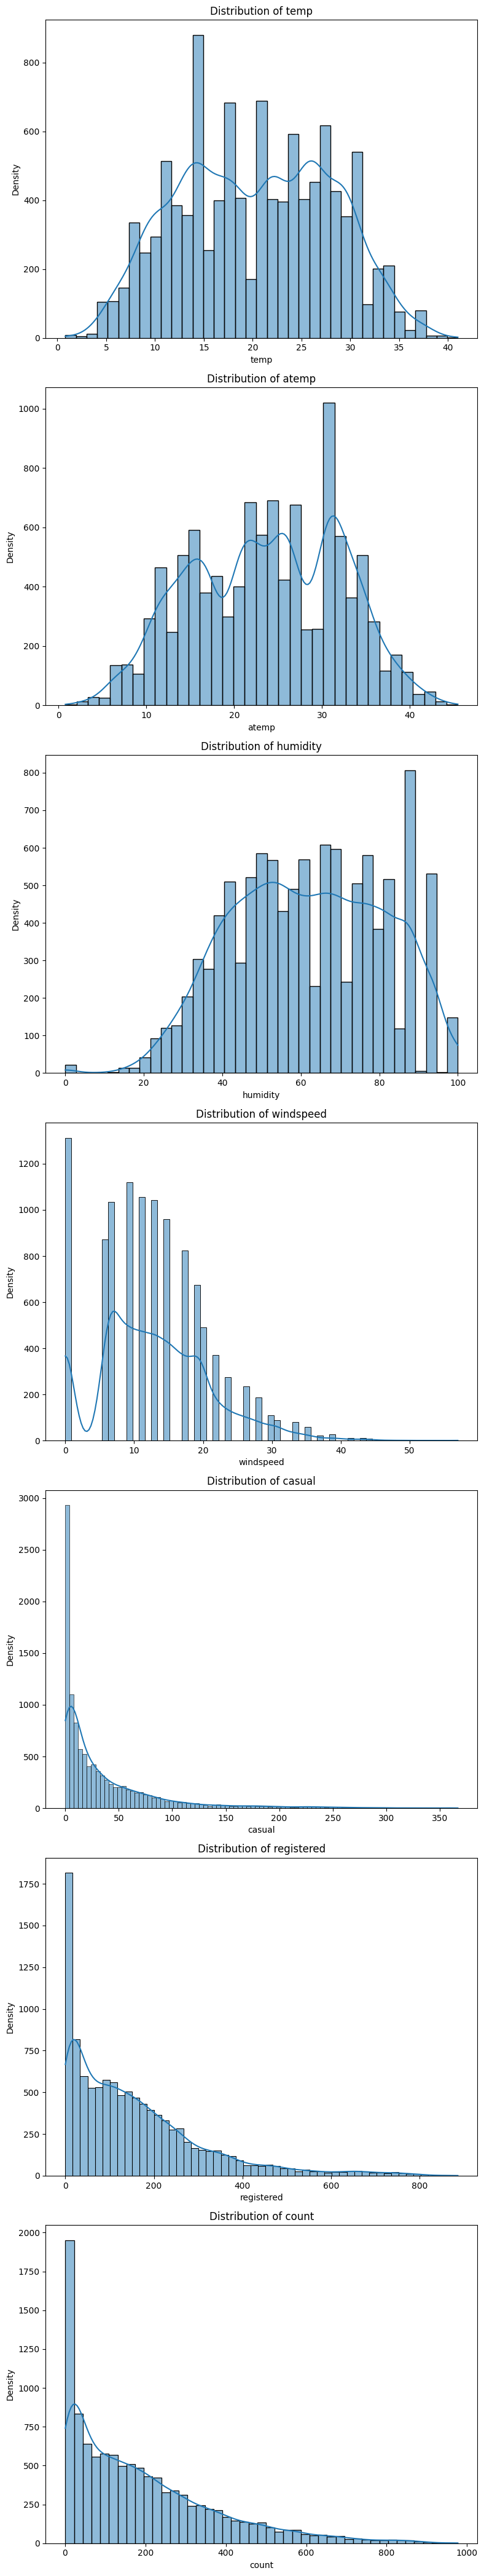

In [ ]:
#distribution for numerical variables
# List of numerical features
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create a figure and axes with subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 6 * len(numerical_features)))

# Create distplots for each numerical feature in separate subplots
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

Inferences:

the graph of casual, registered and count looks like positively skewed and they follow Log Normal Distribution.

temp, atemp and humidity looks like they follows the roughly Normal Distribution.

windspeed looks like bimodal graph(follows binomial distribution).


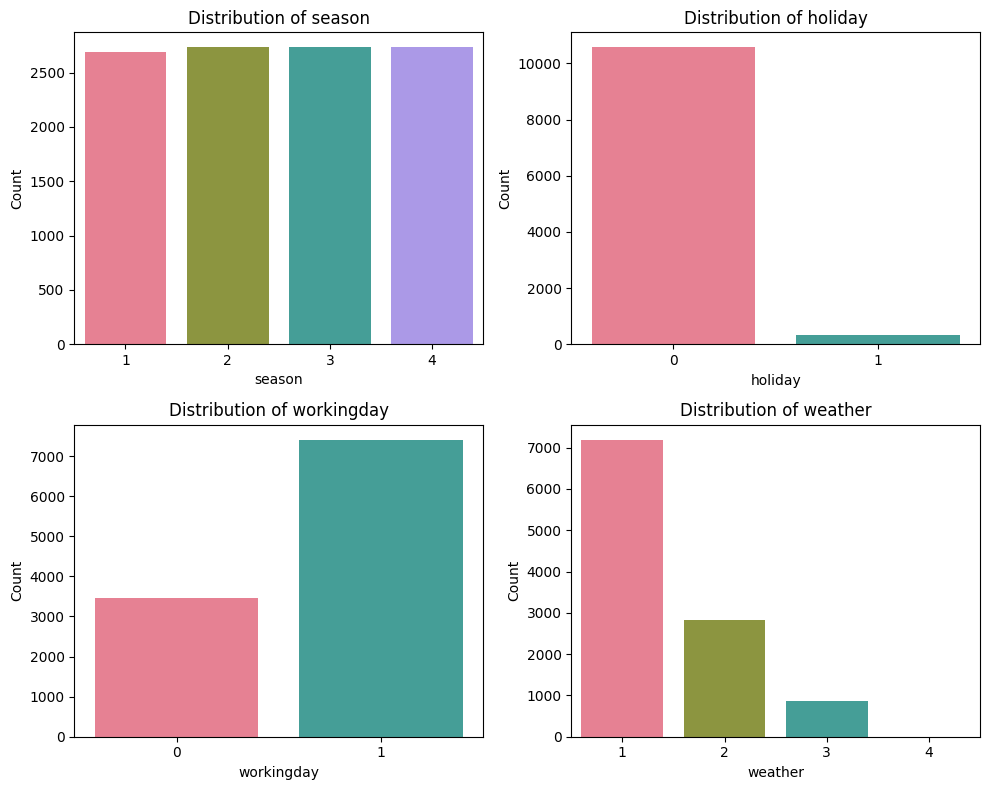

In [ ]:
#distribution for categorical variables
# List of categorical features
categorical_features = ['season', 'holiday', 'workingday', 'weather']

# countplot of each categorical column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    categories = df[feature].unique()
    num_categories = len(categories)

    palette = sns.color_palette("husl", num_categories)

    sns.countplot(data=df, x=feature, hue=feature, ax=ax, palette=palette, legend=False)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Inferences:

Data looks common as it contains equal number of days in each season.

more working days and less holidays

weather is mostly Clear, Few clouds, partly cloudy

In [ ]:
#Detecting outliers

# List of continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# printing outliers for each continuous variable
for var in continuous_vars:
    outliers = detect_outliers_iqr(df, var)
    print(f"Outliers for {var}:\n{outliers}\n")
    print("\n")


Outliers for temp:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []



Outliers for atemp:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []



Outliers for humidity:
                datetime season holiday workingday weather   temp   atemp  \
1091 2011-03-10 00:00:00      1       0          1       3  13.94  15.910   
1092 2011-03-10 01:00:00      1       0          1       3  13.94  15.910   
1093 2011-03-10 02:00:00      1       0          1       3  13.94  15.910   
1094 2011-03-10 05:00:00      1       0          1       3  14.76  17.425   
1095 2011-03-10 06:00:00      1       0          1       3  14.76  16.665   
1096 2011-03-10 07:00:00      1       0          1       3  15.58  19.695   
1097 2011-03-10 08:00:00      1       0          1       3  15.58  19.695   
1098 2011-03-10 09:00:00  

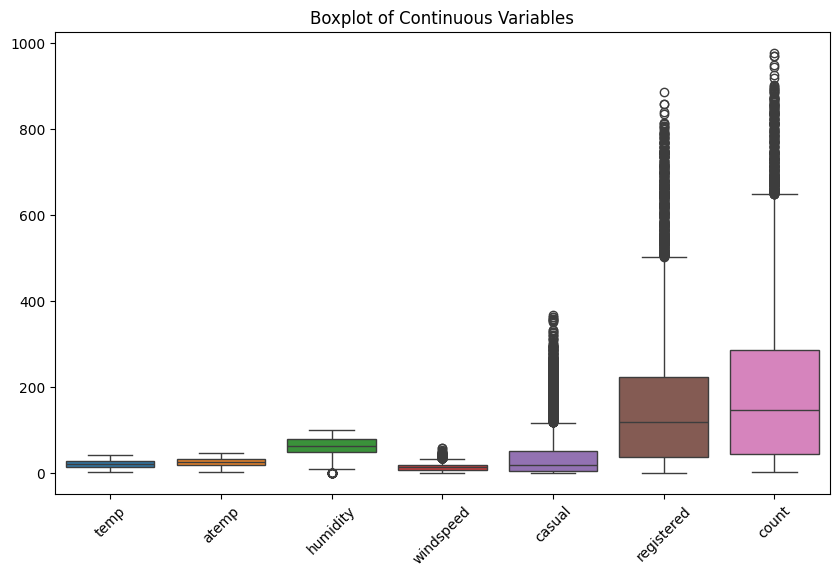

In [ ]:
#Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[continuous_vars])
plt.title('Boxplot of Continuous Variables')
plt.xticks(rotation=45)
plt.show()


Inferences:

humidity,windspeed, casual, registered and count have outliers in the data.

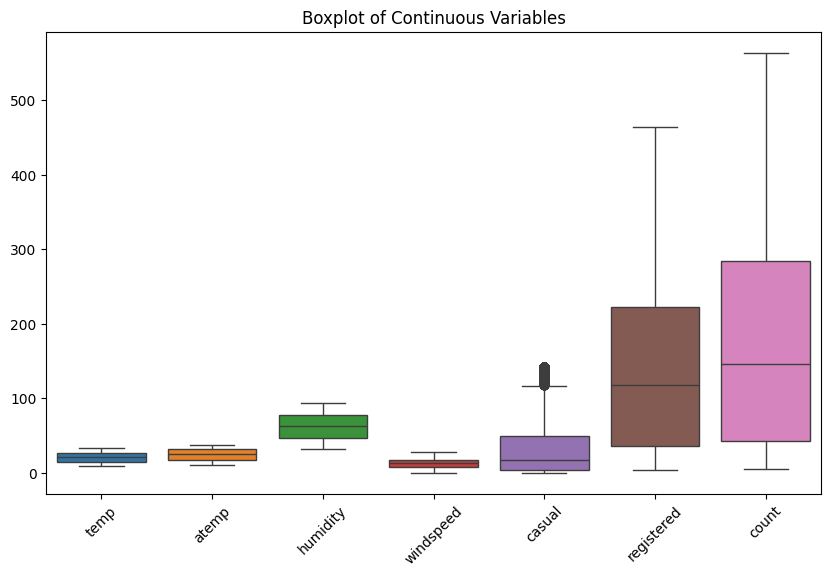

In [ ]:
#Handling Outliers
#Remove/clip the data between the 5 percentile and 95 percentile
# Upper and lower bounds for clipping
upper_bound = df[continuous_vars].quantile(0.95)
lower_bound = df[continuous_vars].quantile(0.05)

# Clip outliers
df[continuous_vars] = df[continuous_vars].clip(lower=lower_bound, upper=upper_bound, axis=1)
#Plotting Boxplot after clipping
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[continuous_vars])
plt.title('Boxplot of Continuous Variables')
plt.xticks(rotation=45)
plt.show()

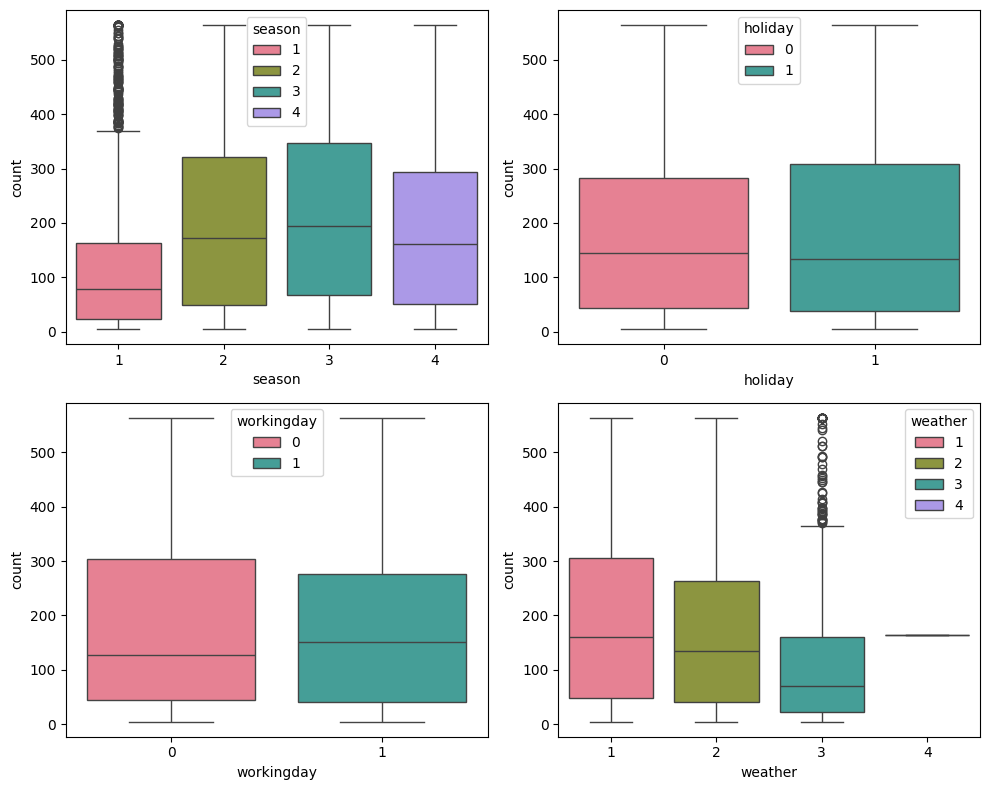

In [ ]:
#Relationship between the Dependent and Independent Variables.

# plotting categorical variables against count using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        ax = axes[row, col]
        feature=categorical_features[index]
        categories = df[categorical_features[index]].unique()
        num_categories = len(categories)
        palette = sns.color_palette("husl", num_categories)
        sns.boxplot(data=df, x=feature, y='count',hue=feature, ax=ax, palette=palette)
        index += 1

plt.tight_layout()
plt.show()

Inferences:

*   In summer and fall seasons more bikes are rented as compared to other seasons.
*   Whenever its a holiday more bikes are rented.
*   It is also clear from the workingday also that whenever day is holiday or weekend, slightly
more bikes were rented.

*   Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

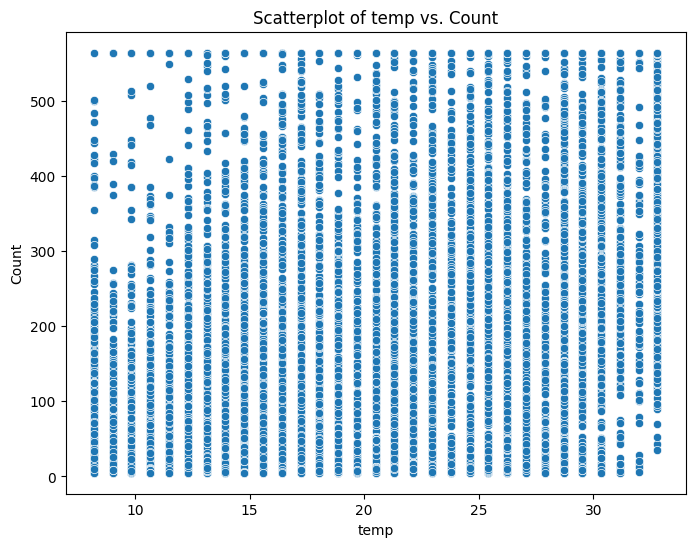

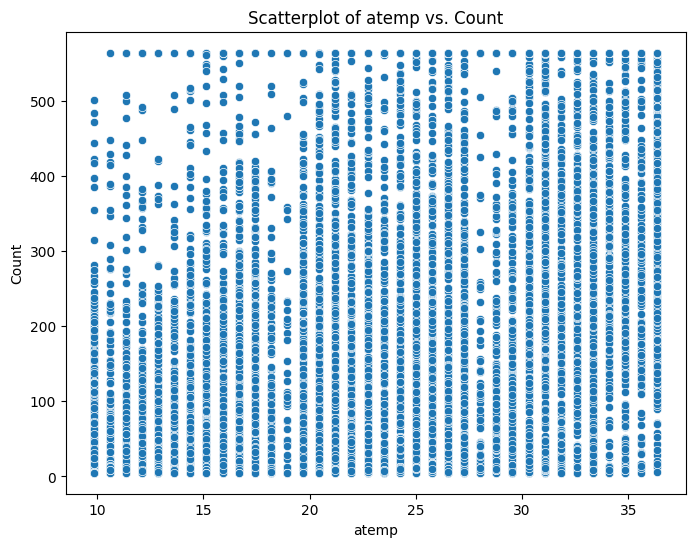

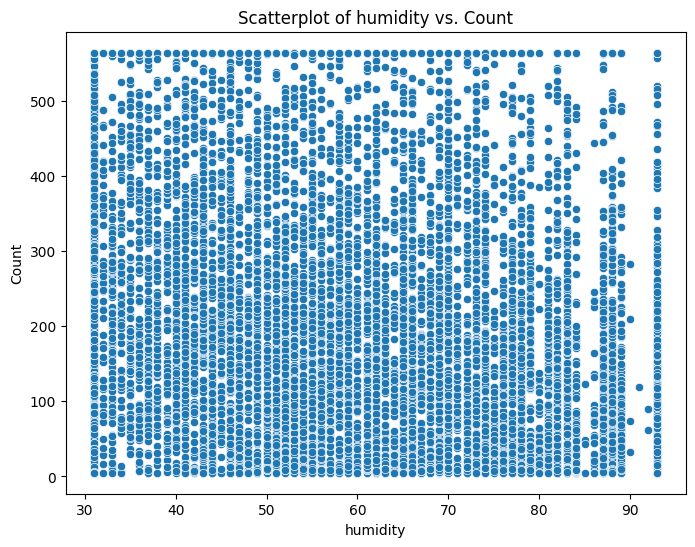

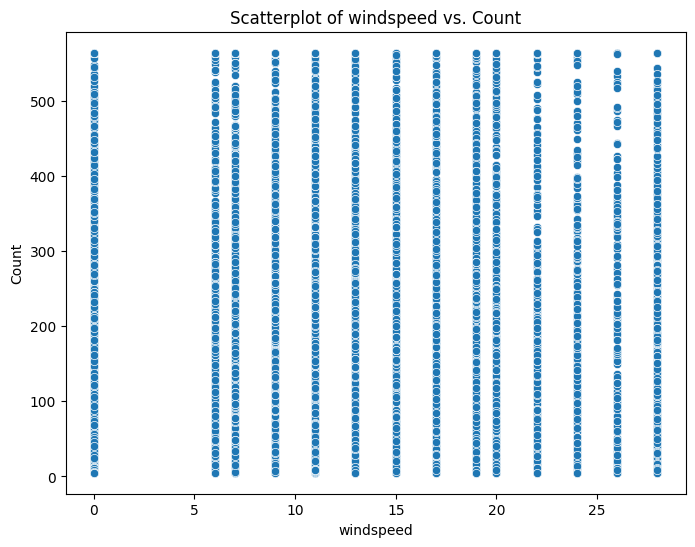

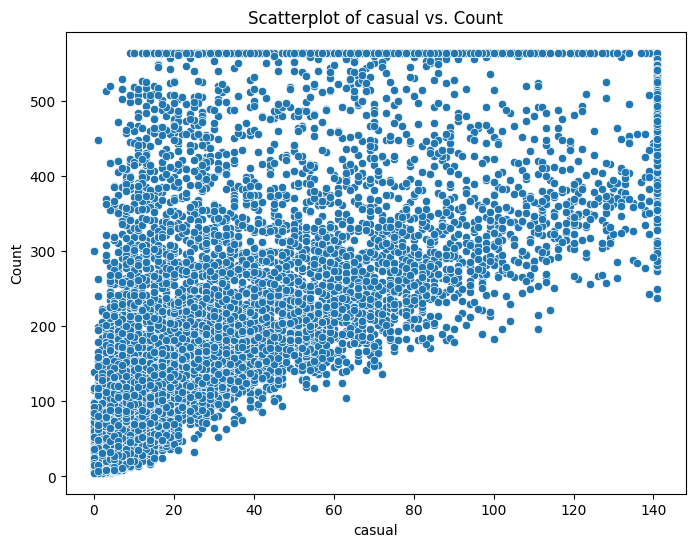

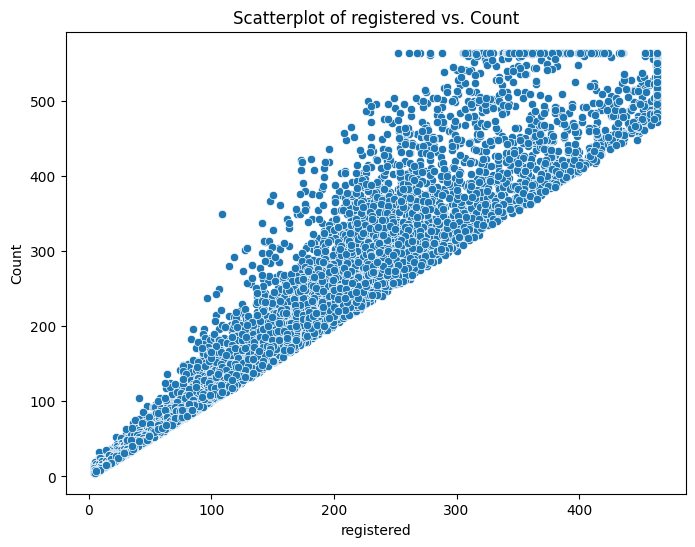

In [ ]:
# plotting numerical variables against count using scatterplot

numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Create scatterplots for each numerical feature against 'count'
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.scatterplot(data=df, x=feature, y='count')
    plt.title(f'Scatterplot of {feature} vs. Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

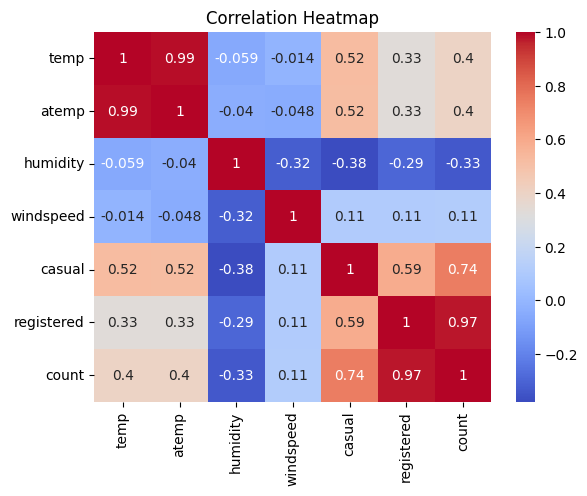

In [ ]:
# understanding the correlation between count and numerical variables
# Calculate the correlation matrix
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Temperature (temp and atemp) and registered users (registered) are the most influential factors affecting the total number of bike rentals (count).

# **HYPOTHESIS TESTING**

# **Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**


**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

Null Hypothesis (H0): There is no significant difference in the average number of bike rides between weekdays and weekends.

Alternate Hypothesis (H1): There is a significant difference in the average number of bike rides between weekdays and weekends.

**b. Select an Appropriate Test**

We'll use a 2-Sample Independent T-test since we're comparing the means of two independent groups (weekday rides and weekend rides).

**c. Set a Significance Level**

We'll set the significance level (alpha) to 5% (0.05). This means we're willing to accept a 5% chance of rejecting the null hypothesis when it's actually true (Type I error).

**d. Calculate Test Statistics / p-value**

In [ ]:
import scipy.stats as stats

weekday_rides = df[df['workingday'] == 1]['count']
weekend_rides = df[df['workingday'] == 0]['count']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(weekend_rides,weekday_rides)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 0.08185262080655475
P-value: 0.934765416165105


**e. Decide whether to accept or reject the Null Hypothesis**

Compare p-value with alpha: Since the p-value is greater than the significance level (0.05), we do not have sufficient evidence to reject the null hypothesis.

**f. Draw Inferences & Conclusions and Provide Recommendations**

Inferences and Conclusions:

No Significant Difference: The analysis, based on the provided p-value, suggests that there is no statistically significant difference in the average number of bike rides between weekdays and weekends.

This indicates that the demand for Yulu bikes is relatively consistent throughout the week, with no significant variation between weekdays and weekends.

Recommendations:

Balanced Resource Allocation: Yulu can maintain a balanced approach to resource allocation, ensuring sufficient bikes, charging stations, and personnel are available across all days of the week.

General Marketing: Marketing efforts can focus on promoting Yulu bikes for various purposes, including commuting, leisure activities, and errands, without specifically targeting weekdays or weekends.

Consistent Operations: Operational hours and staffing levels can be maintained consistently throughout the week, reflecting the relatively stable demand patterns.




# **Check if the demand of bicycles on rent is the same for different Weather conditions?**


a. **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

Null Hypothesis (H0): The average demand for bicycles on rent is the same across all weather conditions.

Alternate Hypothesis (H1): The average demand for bicycles on rent is not the same for at least one weather condition.

b. **Select an appropriate test**

We'll use the one-way ANOVA test to compare the means of the 'count' variable (demand for bicycles) across different weather conditions ('weather' variable).

c. **Check assumptions of the test**

i. Normality

Histogram, Q-Q Plot, Skewness & Kurtosis:

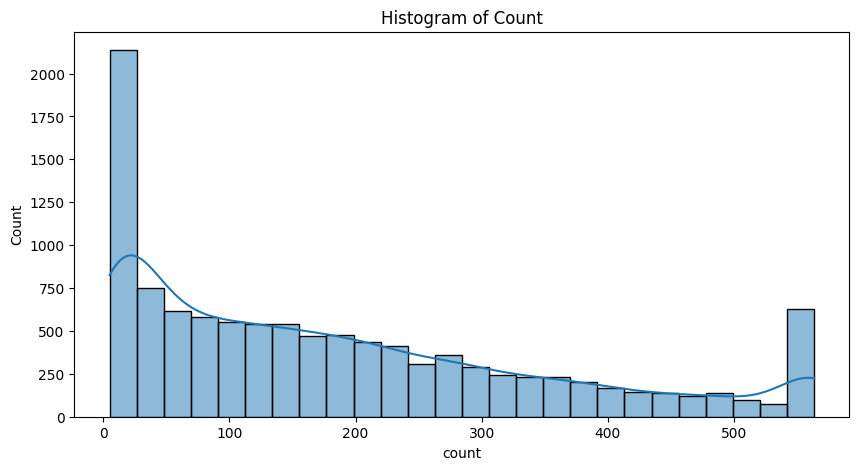

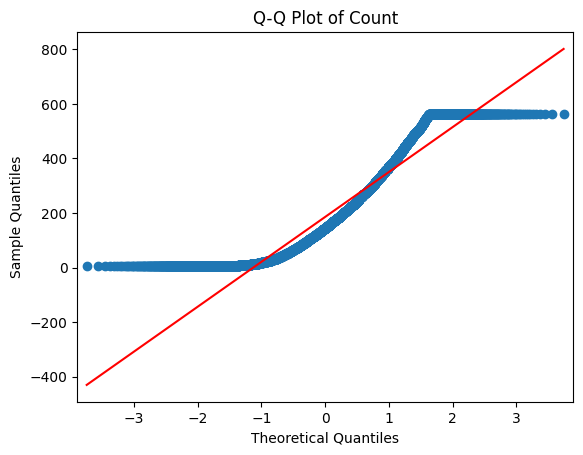

Skewness: 0.8474360901550932
Kurtosis: -0.2870976794298121


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Histogram and Q-Q plot for 'count' variable
plt.figure(figsize=(10, 5))
sns.histplot(df['count'], kde=True)
plt.title('Histogram of Count')


sm.qqplot(df['count'], line='s')
plt.title('Q-Q Plot of Count')
plt.show()

# Skewness and Kurtosis
print(f"Skewness: {df['count'].skew()}")
print(f"Kurtosis: {df['count'].kurt()}")

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk test for 'count' variable
statistic, p_value = shapiro(df['count'])
print(f"Shapiro-Wilk Test - Statistic: {statistic}, P-value: {p_value}")

Shapiro-Wilk Test - Statistic: 0.8913681450609616, P-value: 1.0181059413379128e-65


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


From above QQplot and also Shapiro-Wilk test indicates that the 'count' variable does not follow a normal distribution.

ii. Equality of Variance (Homoscedasticity)

Levene's test:

In [ ]:
from scipy.stats import levene

    # Levene's test for 'count' variable across different weather conditions
statistic, p_value = levene(
df['count'][df['weather'] == 1],
df['count'][df['weather'] == 2],
df['count'][df['weather'] == 3],
df['count'][df['weather'] == 4]
    )
print(f"Levene's Test - Statistic: {statistic}, P-value: {p_value}")

Levene's Test - Statistic: 63.561909332553384, P-value: 9.825185817580428e-41


The p-value is extremely small (9.825e-41), much lower than the typical significance level of 0.05. This means there is very strong evidence to reject the null hypothesis of equal variances.

Levene's test indicates that the variances of the 'count' variable are not equal across different weather conditions.

**Since both the normality and equality of variance assumptions for ANOVA are violated in this case, using the Kruskal-Wallis test**

d. **Set a significance level and Calculate the test Statistics / p-value**

We'll set the significance level (alpha) to 5% (0.05).

**e. Decide whether to accept or reject the Null Hypothesis**

If the p-value is less than or equal to 0.05, we reject the null hypothesis.

If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(
df['count'][df['weather'] == 1],
df['count'][df['weather'] == 2],
df['count'][df['weather'] == 3],
df['count'][df['weather'] == 4]
)
print(f"Kruskal-Wallis Test - Statistic: {statistic}, P-value: {p_value}")

Kruskal-Wallis Test - Statistic: 204.7853967605586, P-value: 3.900417263983396e-44


The p-value is extremely small (3.900e-44), far below the typical significance level of 0.05.

This means there is very strong evidence to **reject the null hypothesis.**


The Kruskal-Wallis test provides strong evidence that the average demand for bicycles on rent is not the same across different weather conditions.



f.** Draw inferences & conclusions from the analysis and provide recommendations.**

Inferences and Conclusions:

Significant Impact of Weather: The analysis strongly indicates that weather conditions have a significant impact on the demand for bike rentals. Different weather conditions lead to significantly different levels of demand.


Recommendations:

Targeted Marketing and Operations: Yulu should adjust its operations and marketing strategies based on weather conditions.

For example, they might:
Offer discounts or promotions during periods of good weather to encourage more rentals.
Reduce bike availability or adjust pricing during bad weather to optimize resource allocation.
Implement safety measures and communication strategies for users during adverse weather.

Weather Forecasting Integration: Yulu could integrate weather forecasting data into its systems to anticipate demand fluctuations and make proactive adjustments to operations.

Analyze user behavior based on weather conditions to identify segments with varying preferences.


# **Check if the demand of bicycles on rent is the same for different Seasons?**



**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

Null Hypothesis (H0): The average demand for bicycles on rent is the same across all seasons.

Alternate Hypothesis (H1): The average demand for bicycles on rent is not the same for at least one season.

**b. Select an appropriate test**


We'll use the one-way ANOVA test to compare the means of the 'count' variable (demand for bicycles) across different seasons.

**c. Check assumptions of the test**

i. Normality
We've already checked the assumptions of normality for the 'count' variable in the previous analysis.

ii. Equality Variance(Levene's test)

In [ ]:
from scipy.stats import levene

# Perform Levene's test for seasons
statistic, p_value = levene(
    df['count'][df['season'] == 1],
    df['count'][df['season'] == 2],
    df['count'][df['season'] == 3],
    df['count'][df['season'] == 4]
)
print(f"Levene's Test for Seasons - Statistic: {statistic}, P-value: {p_value}")

Levene's Test for Seasons - Statistic: 209.56811291531554, P-value: 3.684749131629985e-132


Levene's test clearly indicates that the variances of the 'count' variable are not equal across different seasons

**Since both the normality and equality of variance assumptions for ANOVA are violated in this case, using the Kruskal-Wallis test**

**d. Set a significance level and Calculate the test Statistics / p-value**

We'll use a significance level (alpha) of 5% (0.05).

**e. Decide whether to accept or reject the Null Hypothesis**

If the p-value is less than or equal to 0.05, we reject the null hypothesis.
If the p-value is greater than 0.05, we fail to reject the null hypothesis.

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for seasons
statistic, p_value = kruskal(
    df['count'][df['season'] == 1],
    df['count'][df['season'] == 2],
    df['count'][df['season'] == 3],
    df['count'][df['season'] == 4]
)
print(f"Kruskal-Wallis Test for Seasons - Statistic: {statistic}, P-value: {p_value}")

Kruskal-Wallis Test for Seasons - Statistic: 690.4515233888959, P-value: 2.4688288437668016e-149


The p-value is extremely small (2.469e-149), far below the typical significance level of 0.05. This provides evidence to reject the null hypothesis.


The Kruskal-Wallis test provides very strong evidence that the average demand for bicycles on rent is not the same across different seasons.

**f. Draw inferences & conclusions from the analysis and provide recommendations.**

Inferences and Conclusions:

Significant Impact of Seasonality: The analysis strongly indicates that seasons have a significant impact on the demand for bike rentals. Different seasons lead to significantly different levels of demand.

Recommendations:

Seasonal Adjustments: Yulu should adjust its operations and marketing strategies to cater to the varying demand patterns across different seasons.

This might involve:
Increasing bike availability and staffing during peak seasons (e.g., summer, fall).
Reducing bike availability and adjusting pricing during off-seasons (e.g., winter).


Implementing targeted marketing campaigns for specific seasons, highlighting the benefits of bike rentals in those conditions.

Promotional Campaigns: Design promotional campaigns that cater to the specific needs and preferences of users during different seasons. For example, offer discounts for winter rentals or promote bike tours during the summer.

Pricing Strategies: Consider adjusting pricing based on seasonal demand. For instance, offer lower prices during off-seasons to incentivize rentals.


# **Check if the Weather conditions are significantly different during different Seasons?**

**a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

Null Hypothesis (H0): There is no association between weather conditions and seasons. They are independent of each other.

Alternate Hypothesis (H1): There is an association between weather conditions and seasons. They are not independent of each other.


**b. Select an appropriate test**

We'll use the Chi-square test of independence to determine if there is a significant relationship between weather conditions and seasons.

**c. Create a Contingency Table against 'Weather' & 'Season' columns**

We'll use pd.crosstab to create a contingency table that shows the frequency distribution of weather conditions across different seasons:

In [ ]:
import pandas as pd

# Create contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])
print(contingency_table)

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


**d. Set a significance level and Calculate the test Statistics / p-value**

We'll set the significance level (alpha) to 5% (0.05).

In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
statistic, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of Freedom: 9
Expected Frequencies: 
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


**e. Decide whether to accept or reject the Null Hypothesis**

If the p-value is less than or equal to 0.05, we reject the null hypothesis.
If the p-value is greater than 0.05, we fail to reject the null hypothesis.

The p-value (1.55e-07) is extremely small, far below the significance level of 0.05. This provides strong evidence to reject the null hypothesis.

The Chi-square test results **indicate a significant association between weather conditions and seasons** This means that weather conditions are not independent of seasons.

**f. Draw inferences & conclusions from the analysis and provide recommendations**

Inferences and Conclusions:

Weather and Seasons are Related: The analysis strongly suggests that weather conditions and seasons are related. Certain weather patterns are more likely to occur during specific seasons, influencing bike rental demand.

Recommendations:

Seasonal Weather-Based Operational Planning:

Adjust bike availability and staffing levels based on the expected weather conditions during different seasons. For example, increase bike availability during seasons with pleasant weather and reduce it during seasons with unfavorable weather.

Use weather forecasts to inform short-term marketing efforts, such as offering discounts during periods of good weather.


User Safety and Information:

Provide weather-related safety guidelines and recommendations to users, especially during seasons with potentially hazardous weather conditions.
Integrate real-time weather information into the Yulu app to help users make informed decisions about their bike rentals.

# **Inferences**


	1.	High Demand Variability: Bike rentals show strong fluctuations, with demand ranging from very low to very high across different days.

	2.	Registered Users Drive Majority of Rentals: Registered users contribute significantly more to total rentals compared to casual users, indicating a loyal and regular customer base.

	3.	Seasonal Impact on Demand: Rentals peak during summer and fall, highlighting clear seasonal patterns.

	4.	Holiday Effect: Demand rises on holidays, suggesting more leisure-driven usage.

	5.	Consistent Weekday vs. Weekend Demand: There is no significant difference between weekday and weekend rental counts, indicating steady demand across the week.

	6.	Temperature and Weather as Key Drivers: Temperature and weather conditions heavily influence rental demand. Pleasant temperatures boost demand, while adverse weather (rain, snow, thunderstorms) lowers it.
  
	7.	Weather and Season Interaction: Certain weather patterns are typical in specific seasons, which together affect demand noticeably.

# **Recommendations**


**Leverage Temperature and Registered Users:**
Prioritize marketing towards registered users.
Introduce temperature-based offers (e.g., discounts on days with pleasant weather).
Launch loyalty programs to retain and engage registered users.


**Optimize Weekday & Weekend Operations:**
Maintain consistent bike availability and operations throughout the week since demand is stable.


**Dynamic Weather-Responsive Strategy:**
Implement dynamic pricing and promotions based on weather forecasts.
Offer incentives during mild adverse weather to sustain demand.

**Seasonal Resource Planning:**
Increase bike availability and marketing efforts during summer and fall.
Offer targeted promotions or discounts during low-demand seasons (winter and spring) to boost utilization.

**Integrated Weather-Season Demand Forecasting:**
Develop predictive models combining weather and seasonality to optimize supply and marketing in advance.

**Safety-First Approach:**
Promote safe riding guidelines, especially during bad weather. Integrate real-time weather alerts and safety tips in the Yulu app.

**Capitalize on Holidays:**
Plan for increased demand during holidays and weekends.
Create special holiday packages or group ride promotions.